In [55]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Destroys the current tf graph and session and creates a new one
# used when we are using same Python Kernel for creating multiple NN
tf.keras.backend.clear_session()

## Loading the dataset
[Info about dataset](https://www.kaggle.com/sammy123/lower-back-pain-symptoms-dataset)

In [22]:
spine_data=pd.read_csv('datasets/Dataset_spine.csv',skiprows=1)

spine_data=spine_data.drop('Unnamed: 13',axis=1)

spine_data.columns=['pelvic_incidence',
                             'pelvic_tilt',
                             'lumbar_lordosis_angle',
                             'sacral_slope',
                             'pelvic_radius',
                             'degree_spondylolisthesis',
                             'pelvic_slope',
                             'direct_tilt',
                             'thoracic_slope',
                             'cervical_tilt',
                             'sacrum_angle',
                             'scoliosis_slope',
                             'class_att']

spine_data=spine_data.sample(frac=1).reset_index(drop=True)

In [23]:
spine_data.head().T

,0,1,2,3,4
pelvic_incidence,50.8193,65.0138,53.4329,34.3823,64.624
pelvic_tilt,15.4022,9.83826,15.8643,2.06268,15.2253
lumbar_lordosis_angle,42.5289,57.7358,37.1659,32.3908,67.6322
sacral_slope,35.4171,55.1755,37.5686,32.3196,49.3987
pelvic_radius,112.193,94.7385,120.568,128.3,90.2985
degree_spondylolisthesis,10.8696,49.697,5.98855,-3.36552,31.3264
pelvic_slope,0.678987,0.151994,0.19892,0.581169,0.781686
direct_tilt,7.1103,14.3986,13.8514,12.0774,24.7626
thoracic_slope,7.2481,8.9024,10.7146,16.6255,18.5975
cervical_tilt,9.94785,10.843,11.3783,7.20496,13.0176


Different features that help us understand the condition of a person and know who can suffer from lower back injury.

In [25]:
spine_data.shape

(309, 13)

In [28]:
# Different Classes
spine_data['class_att'].unique()

array(['Abnormal', 'Normal'], dtype=object)

In [29]:
# Understanding the values of the data
spine_data.describe().T

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,309.0,60.488461,17.263875,26.147921,46.426366,58.599529,72.955644,129.834041
pelvic_tilt,309.0,17.526609,10.020486,-6.554948,10.659859,16.297915,21.936186,49.431864
lumbar_lordosis_angle,309.0,51.970806,18.570850,14.000000,37.000000,49.775534,63.000000,125.742385
sacral_slope,309.0,42.961852,13.444131,13.366931,33.340707,42.436230,52.744711,121.429566
pelvic_radius,309.0,117.982945,13.293668,70.082575,110.709912,118.343321,125.480174,163.071041
degree_spondylolisthesis,309.0,26.382620,37.589418,-11.058179,1.630664,12.072644,41.422828,418.543082
pelvic_slope,309.0,0.472101,0.285831,0.003220,0.223550,0.474889,0.702208,0.998827
direct_tilt,309.0,21.349861,8.638998,7.027000,13.181300,21.907400,28.970300,36.743900
thoracic_slope,309.0,13.059741,3.404188,7.037800,10.416000,12.919700,15.938100,19.324000
cervical_tilt,309.0,11.922406,2.891564,7.030600,9.535750,11.953700,14.358430,16.821080


Thus, we see that the mean the std of different features are very different hence, it'll be better to standardize the data.

In [40]:
# Checking the class distribution of the data
spine_data['class_att'].value_counts()

Abnormal    209
Normal      100
Name: class_att, dtype: int64

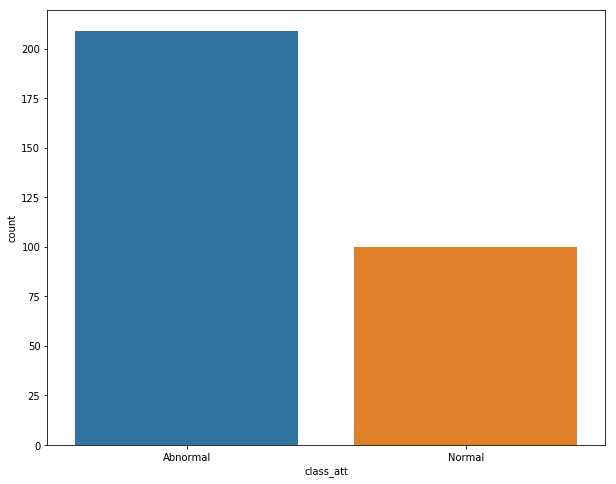

In [41]:
# Alternatively
plt.figure(figsize=(10,8))

sns.countplot('class_att',data=spine_data)
plt.xlabel('class_att')
plt.ylabel('count')
plt.show()

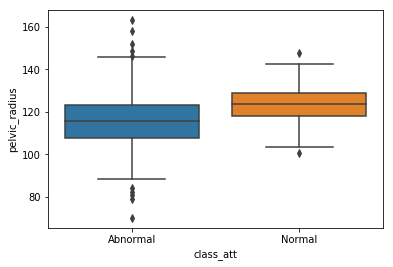

In [42]:
# Understanding values for different features for each class
sns.boxplot('class_att','pelvic_radius',data=spine_data)
plt.xlabel('class_att')
plt.ylabel('pelvic_radius')
plt.show()

We see that pelvic_radius values are higher for those who suffer for lower back pain.

## Encoding target values

In [44]:
# Abnormal : 0 and Normal : 1
spine_data['class_att']=np.where(spine_data['class_att']=='Abnormal',0,1)

In [45]:
spine_data.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,class_att
0,50.819268,15.402213,42.528939,35.417055,112.192804,10.869566,0.678987,7.1103,7.2481,9.94785,-17.379206,14.7187,0
1,65.013773,9.838262,57.735837,55.175511,94.738525,49.696955,0.151994,14.3986,8.9024,10.84295,6.573829,35.1025,0
2,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,0.198920,13.8514,10.7146,11.37832,-20.510434,25.9477,0
3,34.382299,2.062683,32.390820,32.319617,128.300199,-3.365516,0.581169,12.0774,16.6255,7.20496,-31.374823,29.5748,1
4,64.624008,15.225303,67.632167,49.398705,90.298468,31.326411,0.781686,24.7626,18.5975,13.01760,-20.526277,17.3548,0


In [47]:
# Extracting the featrues data and the target seperately
features=spine_data.drop('class_att',axis=1)
target=spine_data['class_att']

## Data Standardization

In [53]:
scaler=StandardScaler()
scaled_features=pd.DataFrame(scaler.fit_transform(features),
                             columns=features.columns,
                             index=features.index)
scaled_features.describe().T

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,309.0,-5.777471e-16,1.001622,-1.992383,-0.815860,-0.109593,0.723326,4.023318
pelvic_tilt,309.0,-2.299491e-17,1.001622,-2.407131,-0.686383,-0.122817,0.440770,3.189167
lumbar_lordosis_angle,309.0,5.748728e-18,1.001622,-2.047962,-0.807453,-0.118402,0.594862,3.978883
sacral_slope,309.0,3.147428e-16,1.001622,-2.204897,-0.716800,-0.039160,0.728848,5.846045
pelvic_radius,309.0,-7.588320e-16,1.001622,-3.609092,-0.547993,0.027153,0.564885,3.397199
degree_spondylolisthesis,309.0,-5.748728e-17,1.001622,-0.997662,-0.659550,-0.381309,0.400767,10.449658
pelvic_slope,309.0,0.000000e+00,1.001622,-1.643074,-0.870985,0.009772,0.806354,1.845781
direct_tilt,309.0,1.386881e-16,1.001622,-1.660620,-0.947079,0.064642,0.883528,1.784815
thoracic_slope,309.0,-3.046826e-16,1.001622,-1.771849,-0.777874,-0.041205,0.846906,1.843147
cervical_tilt,309.0,1.465926e-16,1.001622,-1.694495,-0.826725,0.010840,0.843826,1.696874


In [56]:
# split the data into trainig and testing
x_train,x_test,y_train,y_test=train_test_split(scaled_features,
                                              target,
                                              test_size=0.15,
                                              random_state=10)
x_train.shape,x_test.shape

((262, 12), (47, 12))

In [57]:
# further splitting the data into training and Validation
x_train,x_val,y_train,y_val=train_test_split(x_train,
                                            y_train,
                                            test_size=0.15,
                                            random_state=10)
x_train.shape,x_val.shape

((222, 12), (40, 12))

## Building and Compiling the model
The Keras `Functional API` is a way to create models that are more flexible than sequential models-models can have non-linear topology, shared layers, multiple inputs and outputs.

In [58]:
def build_and_compile_model():
    inputs=tf.keras.Input(shape=(x_train.shape[1],))
    # in functional API layers are callable hence needs to pass the i/p
    x=layers.Dense(16,activation='relu')(inputs)
    x=layers.Dropout(0.3)(x)
    x=layers.Dense(8,activation='relu')(x)
    predictions=layers.Dense(1,activation='sigmoid')(x)
    
    model=tf.keras.Model(inputs=inputs,outputs=predictions)
    
    model.summary()
    
    # BinaryCrossEntropy is the preferred loss for binary classification
    # it is the same as the logloss
    model.compile(optimizer=tf.keras.optimizers.RMSprop(0.001),
                  loss=tf.keras.losses.BinaryCrossentropy(),
                  metrics=['accuracy',
                           tf.keras.metrics.Precision(0.5),
                           tf.keras.metrics.Recall(0.5)])
    
    return model

In [59]:
model=build_and_compile_model()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 12)]              0         
_________________________________________________________________
dense (Dense)                (None, 16)                208       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________


## Visualising the layers 

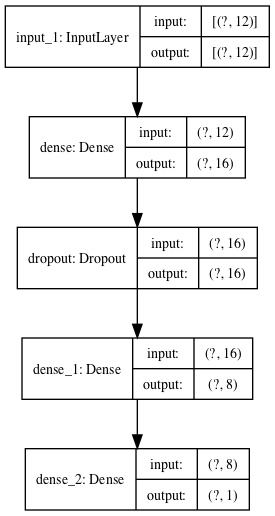

In [60]:
keras.utils.plot_model(model,show_shapes=True)

## Dealing large amout of Data in TF
When dealing with large amount of data it's convenient to work in batches of data rather than using a single large numpy array of data.

In [62]:
data_train=tf.data.Dataset.from_tensor_slices((x_train.values,y_train.values))

# Dividing data into batches of size 16
data_train=data_train.batch(16)

data_train.shuffle(128)

<ShuffleDataset shapes: ((None, 12), (None,)), types: (tf.float64, tf.int64)>

In [63]:
n_epochs=10
model.fit(data_train,epochs=n_epochs)

Epoch 1/10
14/14 [==============================] - 0s 3ms/step - loss: 0.7950 - accuracy: 0.3559 - precision: 0.2248 - recall: 0.4028
Epoch 2/10
14/14 [==============================] - 0s 3ms/step - loss: 0.7116 - accuracy: 0.4730 - precision: 0.2632 - recall: 0.3472
Epoch 3/10
14/14 [==============================] - 0s 2ms/step - loss: 0.7168 - accuracy: 0.5315 - precision: 0.3049 - recall: 0.3472
Epoch 4/10
14/14 [==============================] - 0s 2ms/step - loss: 0.6446 - accuracy: 0.6261 - precision: 0.3922 - recall: 0.2778
Epoch 5/10
14/14 [==============================] - 0s 2ms/step - loss: 0.6360 - accuracy: 0.6486 - precision: 0.4375 - recall: 0.2917
Epoch 6/10
14/14 [==============================] - 0s 2ms/step - loss: 0.6095 - accuracy: 0.6667 - precision: 0.4688 - recall: 0.2083
Epoch 7/10
14/14 [==============================] - 0s 2ms/step - loss: 0.5965 - accuracy: 0.6622 - precision: 0.4595 - recall: 0.2361
Epoch 8/10
14/14 [==============================] - 0s 

In [65]:
# Using validation set along training data
data_val=tf.data.Dataset.from_tensor_slices((x_val.values,y_val.values))
data_val=data_val.batch(16)

model=build_and_compile_model()

training_hist=model.fit(data_train,
                       epochs=n_epochs,
                       validation_data=data_val)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 12)]              0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)                208       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
14/14 [==============================] - 0s 29ms/step - loss: 0.7348 - accuracy: 0.5360 - precision_2: 0.1220 - reca

## Visualisation for loss and Accuracy

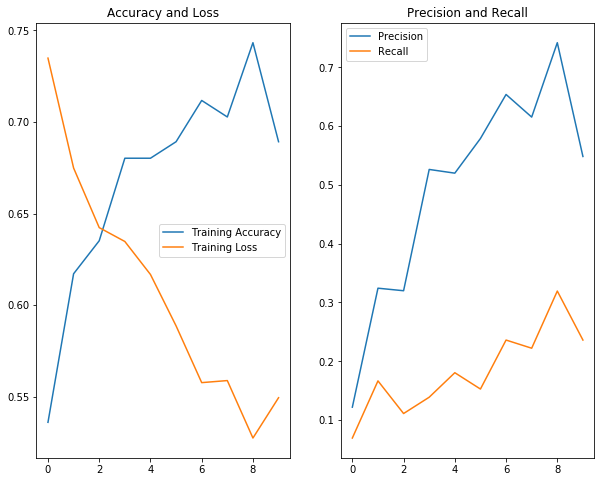

In [66]:
train_acc=training_hist.history['accuracy']
train_loss=training_hist.history['loss']

precision=training_hist.history['precision_2']
recall=training_hist.history['recall_2']

epoch_range=range(n_epochs)

plt.figure(figsize=(10,8))

plt.subplot(1,2,1)
plt.plot(epoch_range,train_acc,label='Training Accuracy')
plt.plot(epoch_range,train_loss,label='Training Loss')
plt.title('Accuracy and Loss')
plt.legend(loc='best')

plt.subplot(1,2,2)
plt.plot(epoch_range,precision,label='Precision')
plt.plot(epoch_range,recall,label='Recall')
plt.title('Precision and Recall')
plt.legend(loc='best')
plt.show()

## Predictions

In [67]:
y_pred=model.predict(x_test)

y_pred[:10]

array([[0.67240065],
       [0.03102437],
       [0.5627919 ],
       [0.28250286],
       [0.12293071],
       [0.25811118],
       [0.09912699],
       [0.40128693],
       [0.23605883],
       [0.28872365]], dtype=float32)

It gives us the probability values for all the observations

In [68]:
y_pred=np.where(y_pred>=0.5,1,0)
y_pred[:10]

array([[1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [70]:
# Let's create a dataframe to create a confusion matrix
pred_results=pd.DataFrame({'y_test':y_test.values.flatten(),
                           'y_pred':y_pred.flatten().astype('int32')},
                          index=range(len(y_pred)))
pred_results.head()

,y_test,y_pred
0,0,1
1,0,0
2,0,1
3,0,0
4,0,0


In [71]:
# Creates a confusion matrix
pd.crosstab(pred_results.y_pred,pred_results.y_test)

y_test,0,1
y_pred,,
0,26,10
1,8,3


[TN,TP,FN,FP] => [26,3,10,8]

In [72]:
accuracy_score(y_test,y_pred)

0.6170212765957447